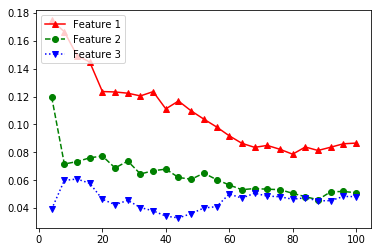

In [100]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
    
# making data frame 
df = pd.read_csv("dataset/Ionosphere.csv") 

features = df.columns[:-1]

df1 = pd.get_dummies(df['class'])

df = pd.concat([df, df1], axis=1).reindex(df.index)

df.drop('class', axis=1, inplace=True)

X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=10)

estimators = 1

xx1 = []
yy1 = []
xx2 = []
yy2 = []
xx3 = []
yy3 = []

finalList = []

while (estimators <= 100):
    rf = RandomForestClassifier(n_estimators=estimators, random_state=10, n_jobs=-1)

    rf.fit(X_train,y_train)

    f_i = list(zip(features,rf.feature_importances_))
    f_i.sort(key = lambda x : x[1])
#     plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
#     plt.show()
    if estimators % 4 == 0:
        xx1.append(estimators)
        yy1.append(f_i[-1][1])
        xx2.append(estimators)
        yy2.append(f_i[-2][1])
        xx3.append(estimators)
        yy3.append(f_i[-3][1])
        
    finalList = f_i
    estimators = estimators + 1

    
plt.plot(xx1, yy1, c='r',marker="^",ls='-',label='Feature 1')
plt.plot(xx2, yy2, c='g',marker="o",ls='--',label='Feature 2')
plt.plot(xx3, yy3, c='b',marker="v",ls=':',label='Feature 3')
plt.legend(loc=2)
plt.show()

gradedFeatures = finalList[::-1]

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
/Lib

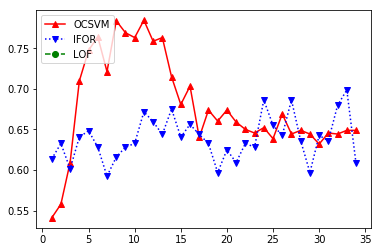

In [88]:
from sklearn.svm import OneClassSVM
import sklearn.metrics as metrics
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

featureX1 = []
aucY1 = []
featureX2 = []
aucY2 = []
featureX3 = []
aucY3 = []

for i in range(len(gradedFeatures)):
    features = [gradedFeatures[j][0] for j in range(i+1)]
    
    X_train, X_test, y_train, y_test = train_test_split( X[features], y, test_size=0.5, random_state=42)
    
    if len(X_train) > len(X_test):
        X_train = X_train[:len(X_test)-len(X_train)]
        y_train = y_train[:len(y_test)-len(y_train)]
    else:
        X_test = X_test[:len(X_train)-len(X_test)]
        y_test = y_test[:len(y_train)-len(y_test)]
    
    # OCSVM
    clf = OneClassSVM(nu=0.001,kernel = "rbf", gamma =1)
    clf.fit(X_train)
    y_pred_proba = clf.predict(X_test)
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    aucY1.append(auc)
    
    # IFOR
    clf = IsolationForest(n_estimators=10, random_state=1)
    clf.fit(X_train)
    y_pred_proba = clf.predict(X_test)
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    aucY2.append(auc)
    
    # LOF
#     clf = LocalOutlierFactor(n_neighbors=10, novelty=True)
#     clf.fit(X)
#     y_pred_proba = clf.predict(X_test)
#     fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#     auc = metrics.roc_auc_score(y_test, y_pred_proba)
#     aucY3.append(auc)
    
    featureX1.append(i+1)
    featureX2.append(i+1)
#     featureX3.append(i+1)

plt.plot(featureX1, aucY1, c='r',marker="^",ls='-',label='OCSVM')
plt.plot(featureX2, aucY2, c='b',marker="v",ls=':',label='IFOR')
plt.plot(featureX3, aucY3, c='g',marker="o",ls='--',label='LOF')
plt.legend(loc=2)
plt.show()